In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, confusion_matrix, accuracy_score
from nextbike.io import *
import sys
import matplotlib.pyplot as plt

sys.path.insert(0,"..")

In [2]:
bremen_test = pd.read_csv(os.path.join(get_data_path(), 'processed/bremen_test.csv'), index_col=0)
bremen_test.head(3)

,identification,start_time,end_time,weekend,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,...,humidity_2m,dew_point_2m,max_at_2m,mean_speed_h/s,direction_degree_x,max_m/s,min_mean_m/s,max_mean_m/s,direction_degree_y,min
bike,,,,,,,,,,,,,,,,,,,,,
20507,10278649,2019-07-03 12:22:00,2019-07-03 12:34:00,0,720.0,8.884911,53.078923,8.884911,53.078923,2985,...,42.7,5.8,19.3,7.1,310.0,9.8,4.5,7.2,290.0,0.0
20507,18508203,2019-07-03 13:52:00,2019-07-03 15:11:00,0,4740.0,8.884911,53.078923,8.875619,53.081062,2985,...,37.0,4.3,19.6,7.2,320.0,11.5,4.1,8.4,310.0,0.0
20507,10278649,2019-07-03 15:42:00,2019-07-03 16:00:00,0,1080.0,8.875644,53.081249,8.884911,53.078923,0,...,48.2,6.7,18.2,6.4,340.0,8.7,3.8,7.8,350.0,0.0


In [3]:
bremen_test['duration_min'] = bremen_test['duration_sec'] / 60

In [4]:
# Number of trips in July 2019
len(bremen_test)

16349

In [5]:
bremen_test[['duration_min']].describe()

,duration_min
count,16349.000000
mean,42.742308
std,130.671905
min,2.000000
25%,8.000000
50%,14.000000
75%,23.000000
max,1438.000000


# Duration


In [6]:
duration = pd.read_csv(os.path.join(get_data_path(), 'predicted/duration_prediction.csv'), parse_dates=['start_time', 'end_time'])
print('R² Score:', r2_score(duration['duration_min'], duration['prediction']))
print('Mean absolute error:', mean_absolute_error(duration['duration_min'], duration['prediction']), 'minutes')

R² Score: 0.007847989830669255
Mean absolute error: 47.88384413008317 minutes


- as we already noticed in the creation of this model there are no sufficiently correlated features for trip duration
- therefore, no further evaluation

# Direction

## To University

In [7]:
uni = pd.read_csv(os.path.join(get_data_path(), 'predicted/direction_prediction_uni.csv'), parse_dates=['start_time', 'end_time'])
uni.sample(5).T

,2613,1414,16233,1947,14258
bike,20584,20558,20996,20568,20933
identification,19371058,8740854,19688464,19554909,18999079
start_time,2019-07-21 17:21:00,2019-07-09 15:20:00,2019-07-28 01:00:00,2019-07-25 11:45:00,2019-07-13 19:48:00
end_time,2019-07-21 17:40:00,2019-07-09 15:33:00,2019-07-28 01:13:00,2019-07-25 11:58:00,2019-07-13 20:21:00
weekend,1,0,1,0,1
duration_sec,1140,780,780,780,1980
start_lng,8.90169,8.79839,8.78894,8.81515,8.87891
start_lat,53.0744,53.0644,53.0795,53.0841,53.0465
end_lng,8.87074,8.82067,8.79148,8.83199,8.82635
end_lat,53.0777,53.0485,53.0904,53.0813,53.0748


In [8]:
# Calculate the exact accuracy score
accuracy_score(uni['to_uni_bool'], uni['prediction_to_uni'])

0.6490305217444492

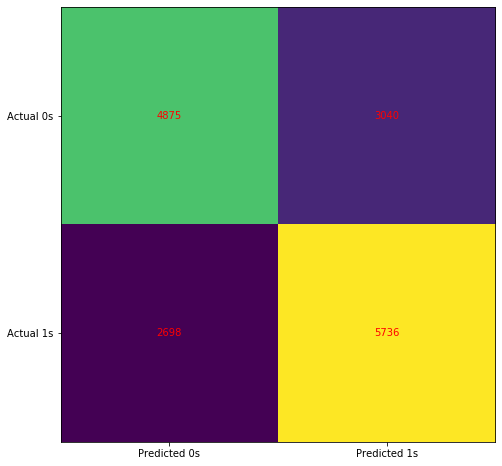

In [9]:
# Function that plots a confusion matrix given independent and target variable
def confusionMatrix(y_true, y_predicted):
    cm = confusion_matrix(y_true, y_predicted)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()

confusionMatrix(uni['to_uni_bool'], uni['prediction_to_uni'])

In [10]:
# Calculate classification report
print(classification_report(uni['to_uni_bool'], uni['prediction_to_uni']))

              precision    recall  f1-score   support

           0       0.64      0.62      0.63      7915
           1       0.65      0.68      0.67      8434

    accuracy                           0.65     16349
   macro avg       0.65      0.65      0.65     16349
weighted avg       0.65      0.65      0.65     16349



- accuracy score of .65 which is close to the accuracy scores of the training data --> that means model generalizes well
- we exspected the model to perform slightly better on the test set as we obtain more training data (prior validation and test data) --> July might be slightly different to the other months in terms of trip direction towards the uni

## To Main Station

In [11]:
main_station = pd.read_csv(os.path.join(get_data_path(), 'predicted/direction_prediction_main_station.csv'), parse_dates=['start_time', 'end_time'])
main_station.sample(5).T

,15244,5634,4676,9745,10844
bike,20968,20671,20644,20805,20835
identification,19806588,8322400,19666569,18552933,19579730
start_time,2019-07-30 16:58:00,2019-07-10 05:23:00,2019-07-27 14:56:00,2019-07-04 12:05:00,2019-07-25 19:02:00
end_time,2019-07-30 17:12:00,2019-07-10 05:31:00,2019-07-27 15:14:00,2019-07-04 12:09:00,2019-07-25 19:18:00
weekend,0,0,1,0,0
duration_sec,840,480,1080,240,960
start_lng,8.83548,8.77576,8.82244,8.8074,8.82435
start_lat,53.0738,53.0913,53.0731,53.0785,53.0599
end_lng,8.80939,8.7607,8.80675,8.80746,8.81863
end_lat,53.0914,53.097,53.091,53.0784,53.0713


In [12]:
# Calculate the exact accuracy score
accuracy_score(main_station['to_main_station_bool'], main_station['prediction_to_main_station'])

0.6884824759924154

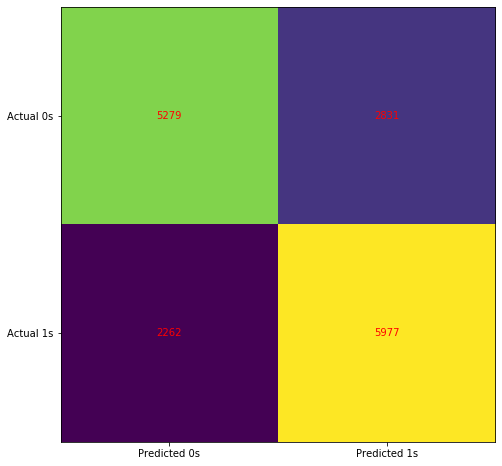

In [13]:
confusionMatrix(main_station['to_main_station_bool'], main_station['prediction_to_main_station'])

In [14]:
# Calculate classification report
print(classification_report(main_station['to_main_station_bool'], main_station['prediction_to_main_station']))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67      8110
           1       0.68      0.73      0.70      8239

    accuracy                           0.69     16349
   macro avg       0.69      0.69      0.69     16349
weighted avg       0.69      0.69      0.69     16349



- accuracy score of .69 which is slightly better than the accuracy scores we got before --> this might be due to the fact that we have more training data now (prior validation and test data)
- as before the model generalizes very well (accuracy score of training, validation and test set differ less than .01)

# Demand

## 1h

In [15]:
demand_1H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_1H.csv'))
demand_1H.sample(5).T

,510,703,250,599,719
number_bookings,22.000000,44.000000,21.000000,17.000000,26.000000
month,7.000000,7.000000,7.000000,7.000000,7.000000
hour,12.000000,15.000000,16.000000,6.000000,7.000000
temp_2m,24.572727,28.759091,19.157143,22.688235,20.100000
min,0.000000,0.000000,5.857143,0.000000,0.000000
prediction_1H,41.578184,48.040366,25.342640,18.459428,23.054095


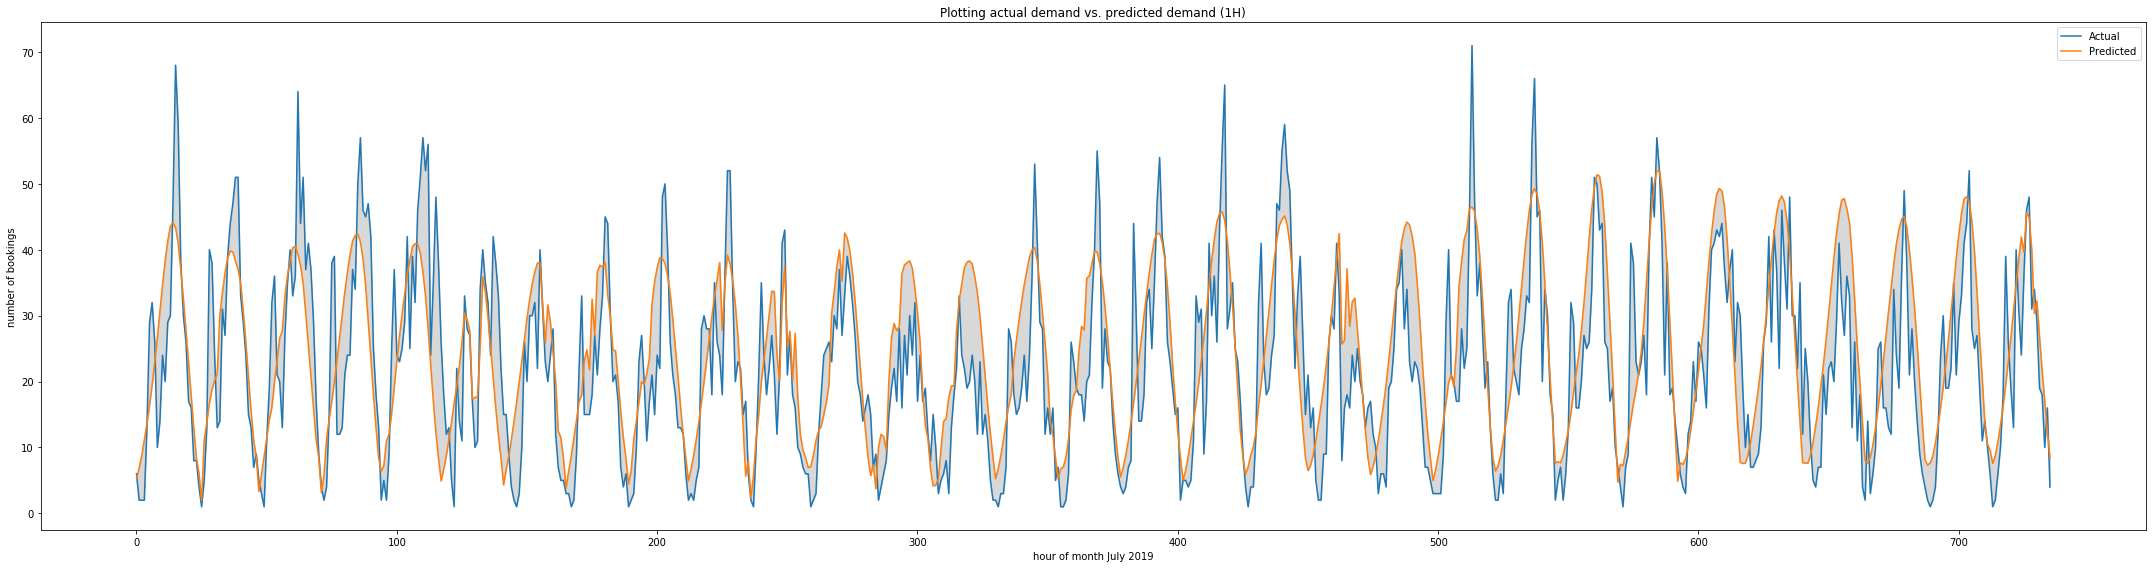

In [16]:
plt.figure(figsize=(30, 8))
plt.plot(demand_1H.index, demand_1H['number_bookings'])
plt.plot(demand_1H.index, demand_1H['prediction_1H'])
plt.fill_between(demand_1H.index, demand_1H['number_bookings'], demand_1H['prediction_1H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (1H)')
plt.xlabel('hour of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_1H.pdf')
plt.show()

In [17]:
print(r2_score(demand_1H['number_bookings'],demand_1H['prediction_1H']))
print(mean_absolute_error(demand_1H['number_bookings'],demand_1H['prediction_1H']))

0.5125932495620568
7.823704283608364


Prior results: RMSE of 9.6278 and R2 of 0.6015 and MAE of 7.3038

## 6h

In [18]:
demand_6H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_6H.csv'))
demand_6H.sample(5).T

,44,18,6,41,85
number_bookings,42.000000,250.000000,265.000000,147.000000,143.000000
month,7.000000,7.000000,7.000000,7.000000,7.000000
hour,3.619048,14.920000,14.490566,8.306122,8.237762
temp_2m,15.540476,19.486400,17.927170,16.866667,19.341958
min,2.619048,0.000000,0.000000,0.102041,1.307692
prediction_6H,53.658045,230.011885,223.598639,155.076324,148.767768


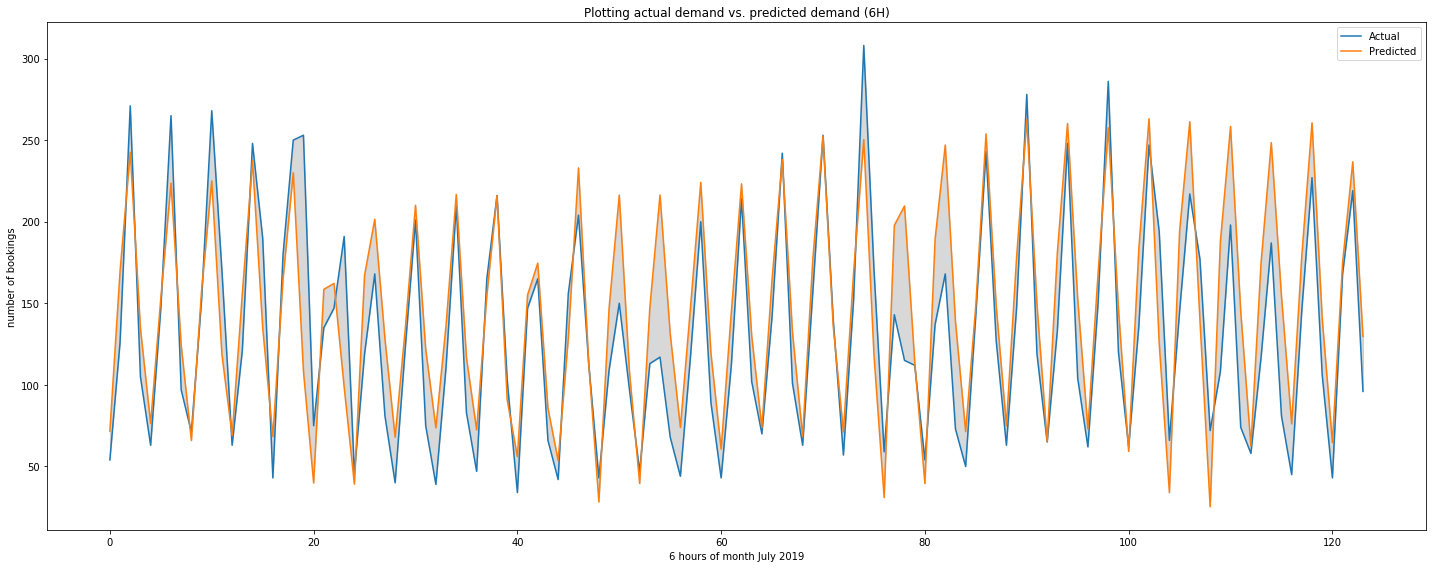

In [19]:
plt.figure(figsize=(20, 8))
plt.plot(demand_6H.index, demand_6H['number_bookings'])
plt.plot(demand_6H.index, demand_6H['prediction_6H'])
plt.fill_between(demand_6H.index, demand_6H['number_bookings'], demand_6H['prediction_6H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (6H)')
plt.xlabel('6 hours of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_6H.pdf')
plt.show()

In [20]:
print(r2_score(demand_6H['number_bookings'],demand_6H['prediction_6H']))
print(mean_absolute_error(demand_6H['number_bookings'],demand_6H['prediction_6H']))

0.6717649157176397
30.3519132714308


Prior results: RMSE of 9.6278 and R2 of 0.6015 and MAE of 7.3038

## 12h

In [21]:
demand_12H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_12H.csv'))
demand_12H.sample(5).T

,44,18,27,15,47
number_bookings,210.000000,212.000000,185.000000,276.000000,352.000000
month,7.000000,7.000000,7.000000,7.000000,7.000000
hour,7.109524,7.490566,16.237838,16.083333,16.241477
temp_2m,22.774762,15.242925,15.868108,15.265942,32.936648
min,0.000000,0.000000,0.000000,0.235507,0.000000
prediction_12H,233.707161,214.619332,340.240769,327.714003,436.118930


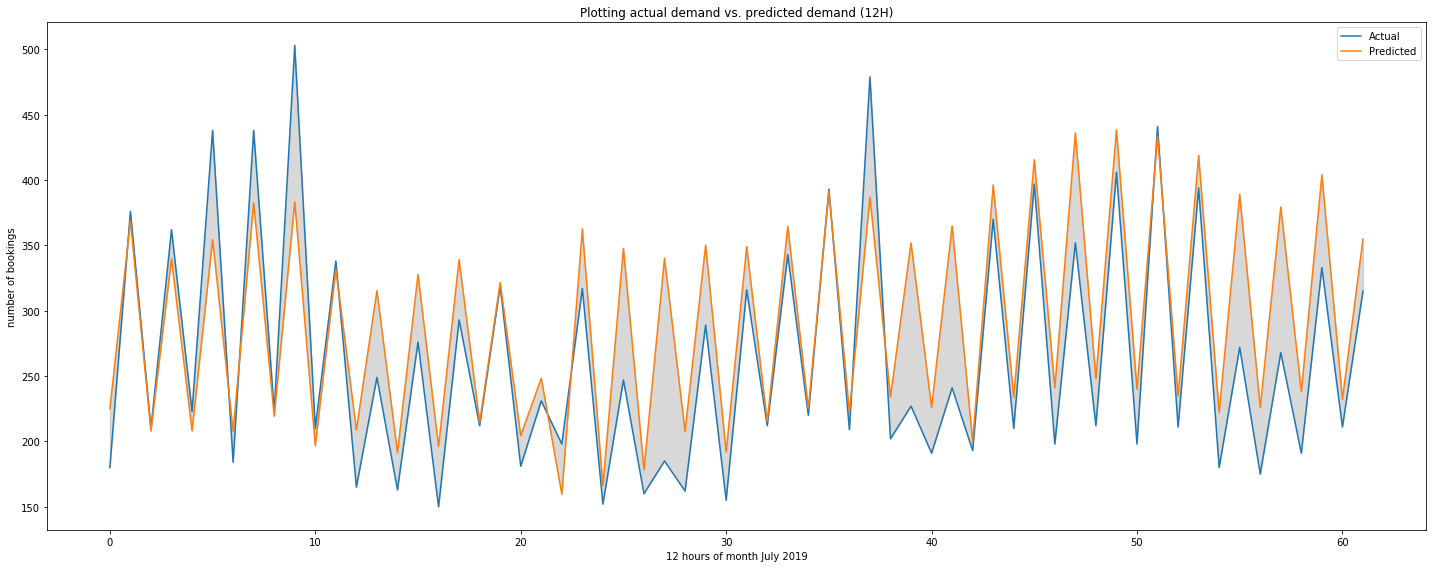

In [22]:
plt.figure(figsize=(20, 8))
plt.plot(demand_12H.index, demand_12H['number_bookings'])
plt.plot(demand_12H.index, demand_12H['prediction_12H'])
plt.fill_between(demand_12H.index, demand_12H['number_bookings'], demand_12H['prediction_12H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (12H)')
plt.xlabel('12 hours of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_12H.pdf')
plt.show()

In [23]:
print(r2_score(demand_12H['number_bookings'],demand_12H['prediction_12H']))
print(mean_absolute_error(demand_12H['number_bookings'],demand_12H['prediction_12H']))

0.6421089920152083
41.88873217152443


## 24h

In [24]:
demand_24H = pd.read_csv(os.path.join(get_data_path(), 'predicted/demand_prediction_24H.csv'))
demand_24H.sample(5).T

,20,4,7,1,10
number_bookings,432.000000,726.000000,439.000000,572.000000,412.000000
month,7.000000,7.000000,7.000000,7.000000,7.000000
hour,11.969907,14.597796,12.826879,12.680070,12.395631
temp_2m,20.879861,17.822727,14.715034,16.735315,17.326456
min,0.000000,0.071625,0.539863,0.148601,2.475728
prediction_24H,554.918471,594.335753,479.358228,513.993174,453.585157


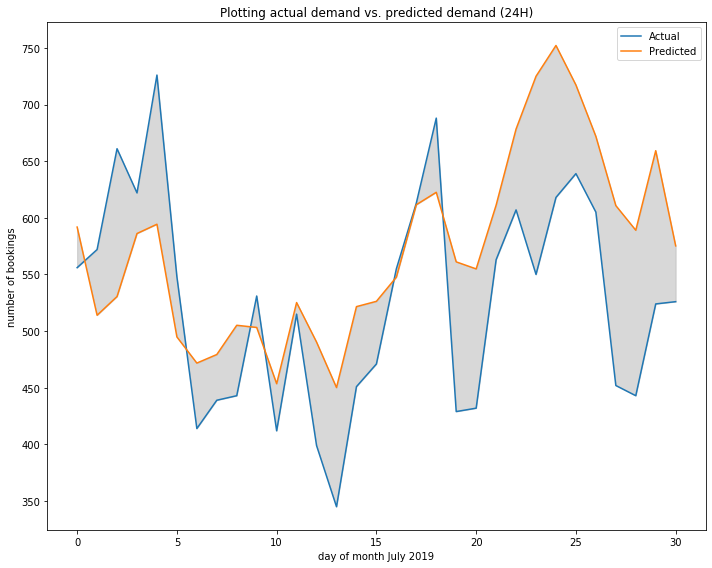

In [25]:
plt.figure(figsize=(10, 8))
plt.plot(demand_24H.index, demand_24H['number_bookings'])
plt.plot(demand_24H.index, demand_24H['prediction_24H'])
plt.fill_between(demand_24H.index, demand_24H['number_bookings'], demand_24H['prediction_24H'], color='grey', alpha='0.3')
plt.legend(['Actual','Predicted'])
plt.title('Plotting actual demand vs. predicted demand (24H)')
plt.xlabel('day of month July 2019')
plt.ylabel('number of bookings')
plt.tight_layout()
plt.savefig('../reports/figures/test_performance_24H.pdf')
plt.show()

In [26]:
print(r2_score(demand_24H['number_bookings'],demand_24H['prediction_24H']))
print(mean_absolute_error(demand_24H['number_bookings'],demand_24H['prediction_24H']))

0.06313569287057619
77.40866196443014


In [27]:
dataset = pd.read_csv(os.path.join(get_data_path(), 'processed/bremen.csv'), index_col=0)
dataset.head(3)

,identification,start_time,end_time,weekend,duration_sec,start_lng,start_lat,end_lng,end_lat,start_place,...,humidity_2m,dew_point_2m,max_at_2m,mean_speed_h/s,direction_degree_x,max_m/s,min_mean_m/s,max_mean_m/s,direction_degree_y,min
bike,,,,,,,,,,,,,,,,,,,,,
20507,14776184,2019-04-21 17:34:00,2019-04-21 17:47:00,1,780.0,8.884911,53.078923,8.899906,53.078711,2985.0,...,24.8,-0.1,21.1,1.8,120.0,2.1,1.0,2.2,110.0,0.0
20507,10278649,2019-04-23 17:55:00,2019-04-23 20:13:00,0,8280.0,8.884911,53.078923,8.884911,53.078923,2985.0,...,43.2,5.9,18.7,6.7,110.0,11.7,3.6,7.3,110.0,0.0
20507,10278649,2019-04-24 10:38:00,2019-04-24 20:19:00,0,34860.0,8.884911,53.078923,8.884911,53.078923,2985.0,...,58.7,11.4,19.7,5.7,100.0,8.2,3.3,5.7,100.0,0.0


In [28]:
# this function attaches over every bar in the bar chart the associated number
def label_bars(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

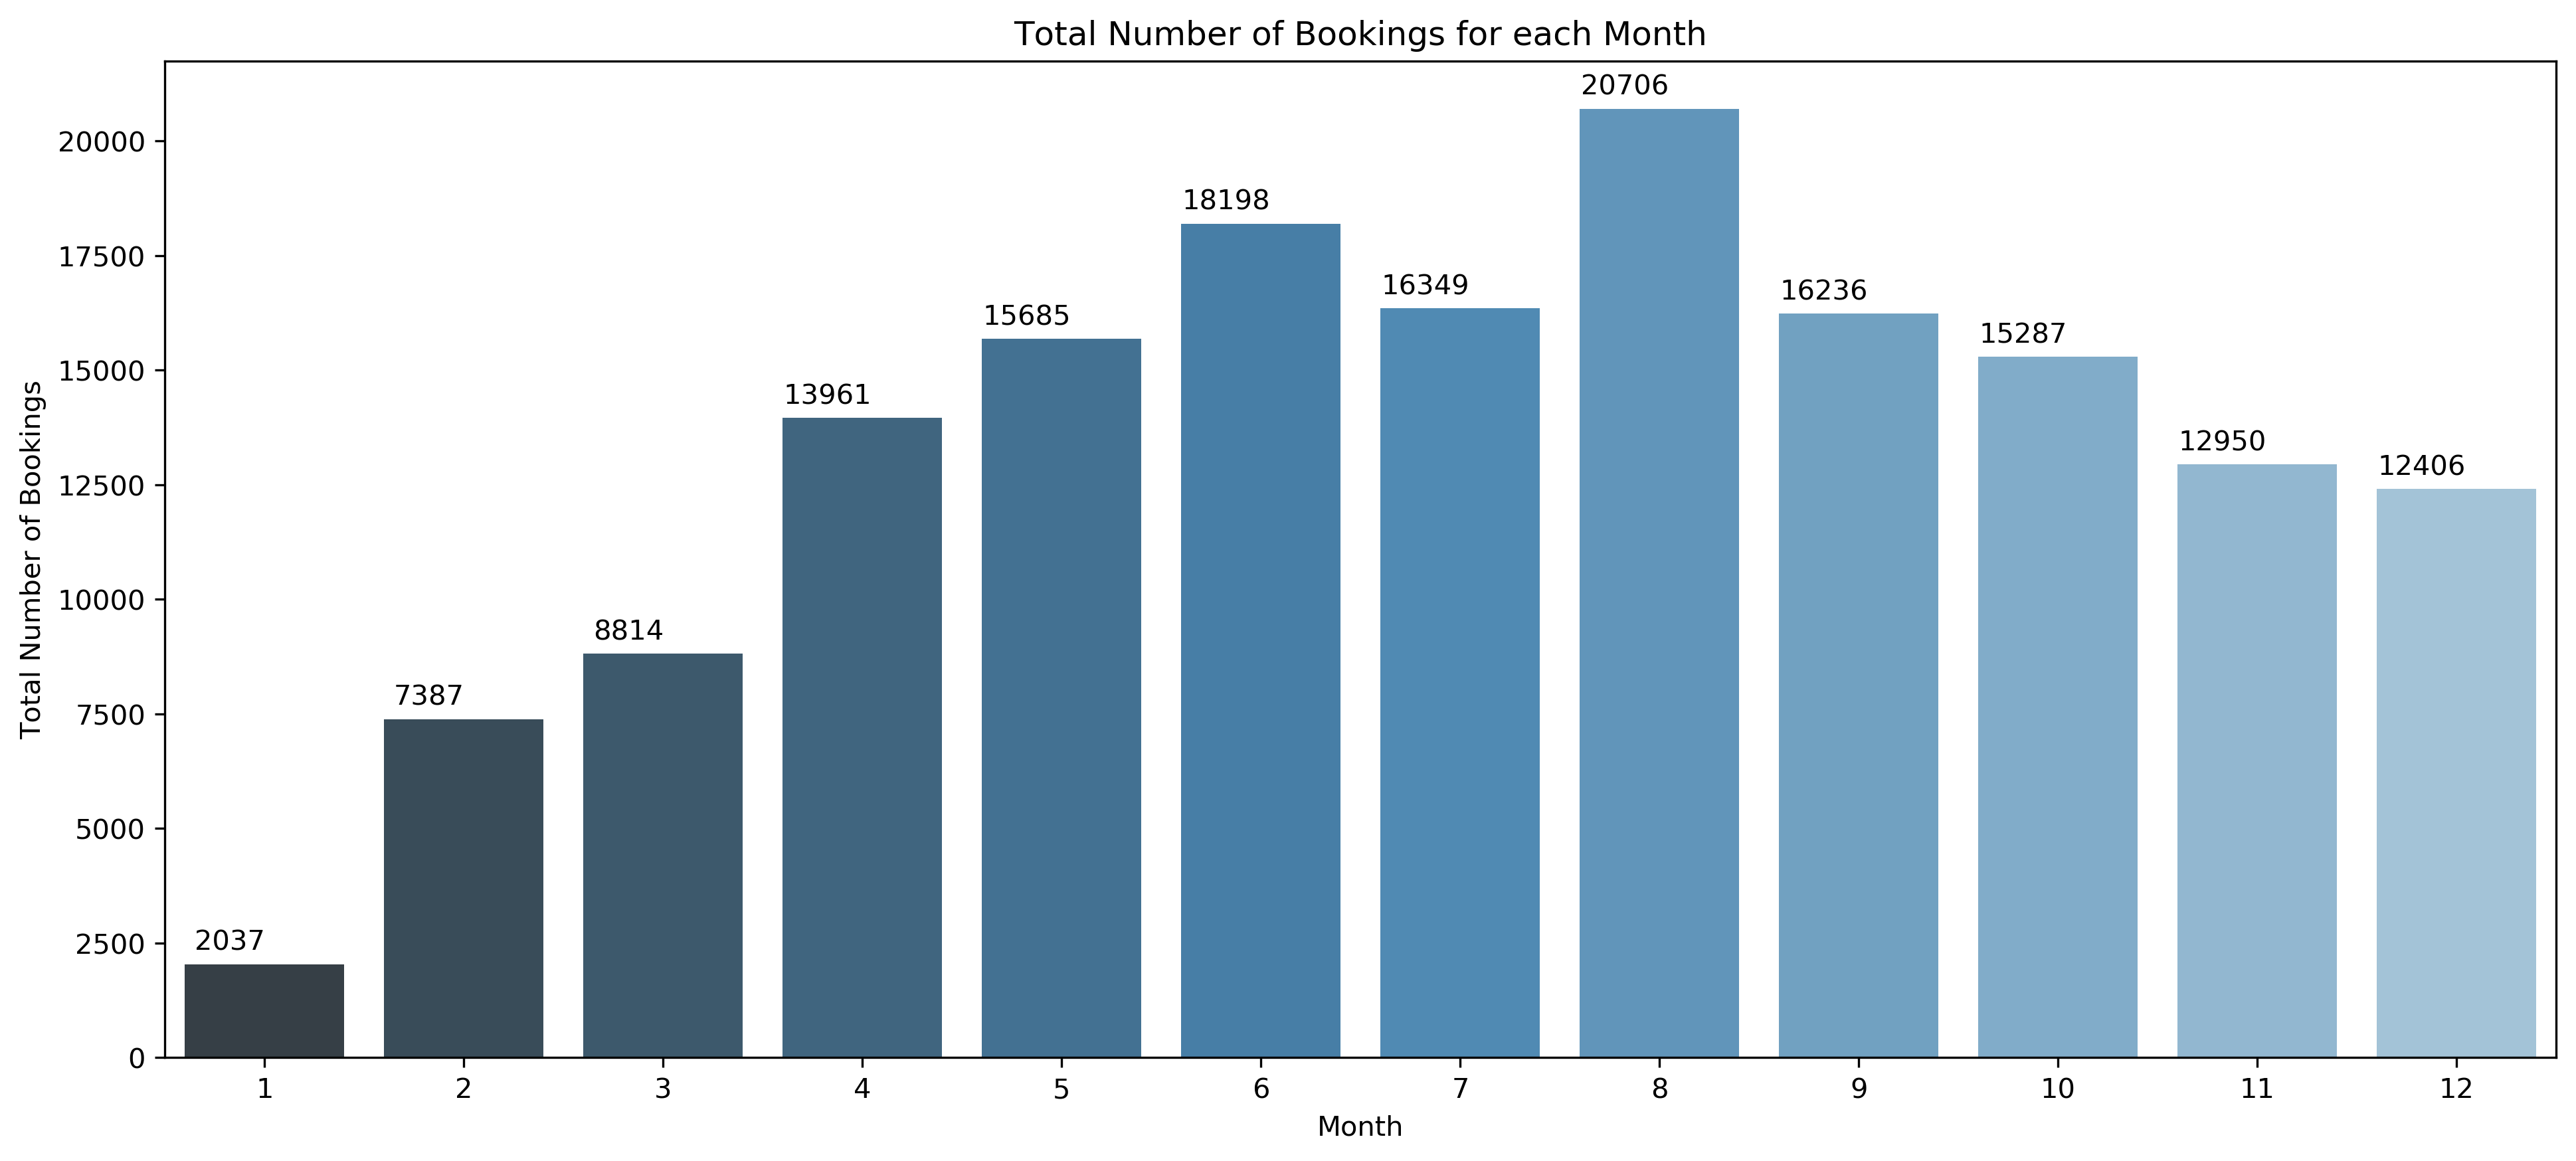

In [29]:
import numpy as np
import seaborn as sns

y = [2037, 7387,8814,13961,15685,18198,16349,20706,16236,15287,12950,12406]
x = np.arange(len(y))
width = 0.35

Fig_1 = plt.figure(figsize=(12,5),dpi = 300)

ax = Fig_1.add_axes([0,0,1,1])

rects1 = ax.bar(x - width/2, y, width)

ax = sns.barplot(x=np.arange(1,13), y=y, palette="Blues_d")

ax.set(ylabel='Total Number of Bookings', xlabel='Month') 

label_bars(rects1)

ax.set_title('Total Number of Bookings for each Month')
plt.savefig("../reports/figures/monthly_distribution_bookings_with_july.pdf", bbox_inches='tight')

- July has less bookings than both months June and August this explains the bias (positive)
- our regression model fits the month of July between June and August especially as the month is a major feature